# Session 1: Dask

In [10]:
import pandas as pd
import numpy as np
!pip install 'fsspec>=0.3.3'
!pip install geopandas
import geopandas as gpd
!pip install dask
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from datetime import datetime
from matplotlib import pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
import dask.array as da
# example
x = da.random.random((10000, 10000), chunks=(1000, 1000))
x

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [3]:
x.compute()

array([[0.16232092, 0.2011889 , 0.25828547, ..., 0.99070073, 0.98998715,
        0.83465111],
       [0.32504401, 0.37784983, 0.51009283, ..., 0.8408342 , 0.63695109,
        0.37560539],
       [0.07245324, 0.25919366, 0.10827411, ..., 0.22925017, 0.74316529,
        0.52484147],
       ...,
       [0.53551607, 0.24809307, 0.61648838, ..., 0.75181781, 0.27084174,
        0.26895206],
       [0.45782997, 0.89431043, 0.03283537, ..., 0.19297872, 0.87668463,
        0.1814758 ],
       [0.67048456, 0.9698357 , 0.55769577, ..., 0.69956257, 0.29693642,
        0.97778881]])

In [4]:
# calculate sum and call compute to print the output
%time x.sum().compute()

CPU times: user 1.32 s, sys: 91.8 ms, total: 1.41 s
Wall time: 411 ms


50003187.63403975

In [5]:
# now let's try the persist() function and then check the time
y = x.persist()
%time y.sum().compute()

CPU times: user 108 ms, sys: 17.7 ms, total: 126 ms
Wall time: 71.6 ms


50003187.63403975

In [13]:
!curl https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-01.csv > yellow_tripdata_2020-01.csv
!curl https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-02.csv > yellow_tripdata_2020-02.csv
# !curl https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-03.csv > yellow_tripdata_2020-03.csv
# !curl https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2020-04.csv > yellow_tripdata_2020-04.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  566M  100  566M    0     0  32.5M      0  0:00:17  0:00:17 --:--:-- 34.6M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  557M  100  557M    0     0  31.5M      0  0:00:17  0:00:17 --:--:-- 34.9M


In [3]:
# read file: 'read_csv()' works just like pandas
%time df = dd.read_csv('yellow_tripdata_2020-01.csv')
#df.head()

CPU times: user 75.6 ms, sys: 7.87 ms, total: 83.5 ms
Wall time: 96.4 ms


In [14]:
# let's check time with pandas 
%time df1 = pd.read_csv('yellow_tripdata_2020-01.csv')
df1.head()

CPU times: user 7.13 s, sys: 3.39 s, total: 10.5 s
Wall time: 10.5 s


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [15]:
df = dd.read_csv('yellow_tripdata_2020-*.csv', dtype={'trip_distance': float,
                        'total_amount': float, 'tolls_amount':float, 'RatecodeID': float, 'VendorID': float, 
                                                     'passenger_count': float, 'payment_type':float, 
                                                     'PULocationID':int, 'DOLocationID':int})
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [12]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
npartitions=20,,,,,,,,,,,,,,,,,,
,float64,object,object,float64,float64,float64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [13]:
#dtypes operation for checking column dtypes
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [16]:
# dropna and droplicates work the same way here
# one difference: some arguments like 'inplace' do not work

# lets drop rows where PULocation and DOLocation are not present
df = df.dropna(subset=['PULocationID', 'DOLocationID'])

# drop duplicate rows
df = df.drop_duplicates()

In [17]:
# now let's try making a new column:travel time
# first need to make pickup and dropoff time columns as datetime - like pandas, 'to_datetime()' operation works here

#convert columns to datetime dtype
df['tpep_pickup_datetime'] = dd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = dd.to_datetime(df['tpep_dropoff_datetime'])

# make a travel time column (minutes)
df['travel_time'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['travel_time'] = (df['travel_time'].dt.seconds)/60

In [16]:
# now let's try calculating some descriptive statistics for trip distance and total amount

df[['trip_distance', 'total_amount']].describe()

,trip_distance,total_amount
npartitions=1,,
,float64,float64
,...,...


In [17]:
# this could take some time
df[['trip_distance', 'total_amount']].describe().compute()

,trip_distance,total_amount
count,1.269141e+07,1.269141e+07
mean,2.893097e+00,1.860853e+01
std,6.553676e+01,1.459481e+01
min,-3.062000e+01,-1.242300e+03
25%,9.600000e-01,1.116000e+01
50%,1.600000e+00,1.430000e+01
75%,2.900000e+00,1.982000e+01
max,2.102401e+05,6.061420e+03


In [18]:
# groupby operation - works the same as pandas

%time df.groupby('PULocationID').count()[['DOLocationID']].compute()

CPU times: user 1min 27s, sys: 5.41 s, total: 1min 33s
Wall time: 1min 1s


,DOLocationID
PULocationID,
1,1375
2,11
3,354
4,20850
5,55
...,...
261,68716
262,168946
263,245148


In [19]:
# calculate mean trip distance and travel time per pickup location

%time df[['PULocationID', 'trip_distance', 'travel_time']].groupby('PULocationID').mean().compute()

CPU times: user 1min 26s, sys: 3.31 s, total: 1min 29s
Wall time: 57.2 s


,trip_distance,travel_time
PULocationID,,
1,0.948400,3.082691
2,10.486364,34.648485
3,7.823051,26.977024
4,2.658529,15.914306
5,18.640182,48.641212
...,...,...
261,4.124110,20.665370
262,2.300101,12.972492
263,2.077715,12.271091


In [20]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'travel_time'],
      dtype='object')

In [18]:
# select few columns that we need for further
df = df[['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 
        'trip_distance', 'PULocationID', 'DOLocationID', 'total_amount', 'travel_time']]

In [22]:
# persist operation to assign some RAM to data
df = df.persist()

In [23]:
type(df)

dask.dataframe.core.DataFrame

In [24]:
# calculate mean trip distance and travel time per pickup location

%time df[['PULocationID', 'trip_distance', 'travel_time']].groupby('PULocationID').mean().compute()

CPU times: user 450 ms, sys: 10.1 ms, total: 460 ms
Wall time: 294 ms


,trip_distance,travel_time
PULocationID,,
1,0.948400,3.082691
2,10.486364,34.648485
3,7.823051,26.977024
4,2.658529,15.914306
5,18.640182,48.641212
...,...,...
261,4.124110,20.665370
262,2.300101,12.972492
263,2.077715,12.271091


## Merge with taxi zone data

In [ ]:
# Let's try the merge operation

# read taxi zone file
zips = gpd.read_file('https://github.com/CUSP2022ADS/Data/raw/main/taxizone.geojson')
zips = zips[['location_id', 'borough', 'shape_area', 'zone']]
zips['location_id'] = pd.to_numeric(zips['location_id'])
zips.head()

,location_id,borough,shape_area,zone
0,1,EWR,0.0007823067885,Newark Airport
1,2,Queens,0.00486634037837,Jamaica Bay
2,3,Bronx,0.000314414156821,Allerton/Pelham Gardens
3,4,Manhattan,0.000111871946192,Alphabet City
4,5,Staten Island,0.000497957489363,Arden Heights


In [ ]:
# merge df with zips file

df = df.merge(zips, how='left', left_on='PULocationID', right_on='location_id')

Text(0, 0.5, 'number of trips')

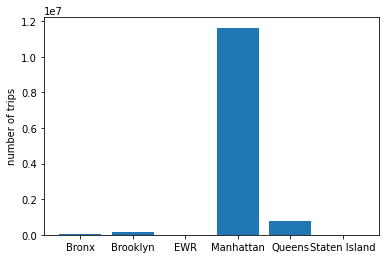

In [ ]:
# we may also use matplotlib functions with dask 

tripByBoro = df.groupby('borough').count()[['DOLocationID']].compute()
plt.bar(tripByBoro.index, tripByBoro.DOLocationID.values)
plt.ylabel('number of trips')



---



**HW Task 1**

In [7]:
# Plot average number of trips as bar plots by day of week
df['pickup_day']=df['tpep_pickup_datetime'].dt.day_name()
df['dropoff_day']=df['tpep_dropoff_datetime'].dt.day_name()
df['month'] = df['tpep_dropoff_datetime'].dt.to_period('M')
df['week'] = df['tpep_dropoff_datetime'].dt.isocalendar().week

In [25]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,total_amount,travel_time,pickup_day,dropoff_day,month,week
90014,NaN,2020-02-28 14:28:00,2020-02-28 14:54:00,8.60,259,247,34.36,26.0,Friday,Friday,2020-02,9
90015,NaN,2020-02-28 14:03:00,2020-02-28 14:11:00,3.01,212,31,26.14,8.0,Friday,Friday,2020-02,9
90016,NaN,2020-02-28 14:55:00,2020-02-28 15:02:00,0.71,42,42,16.98,7.0,Friday,Friday,2020-02,9
90017,NaN,2020-02-28 14:29:00,2020-02-28 14:51:00,12.40,38,53,34.09,22.0,Friday,Friday,2020-02,9
90018,NaN,2020-02-28 14:06:00,2020-02-28 14:38:00,6.96,226,135,33.85,32.0,Friday,Friday,2020-02,9


In [8]:
mask = (df['month'] >= '2020-01') & (df['month'] <= '2020-02')
print(df.loc[mask])
dfm = df.loc[mask]

Dask DataFrame Structure:
              VendorID tpep_pickup_datetime tpep_dropoff_datetime trip_distance PULocationID DOLocationID total_amount travel_time pickup_day dropoff_day      month    week
npartitions=1                                                                                                                                                               
               float64       datetime64[ns]        datetime64[ns]       float64        int64        int64      float64     float64     object      object  period[M]  UInt32
                   ...                  ...                   ...           ...          ...          ...          ...         ...        ...         ...        ...     ...
Dask Name: loc-series, 137 tasks


In [9]:
dfm.groupby(['month','week','dropoff_day'])['tpep_dropoff_datetime'].count().compute()

month    week  dropoff_day
2020-01  1     Friday         182810
               Saturday       182314
               Sunday         165612
               Thursday       162052
               Wednesday      168258
         2     Friday         225137
               Monday         177714
               Saturday       216167
               Sunday         187393
               Thursday       229241
               Tuesday        199020
               Wednesday      214664
         3     Friday         243055
               Monday         209105
               Saturday       190808
               Sunday         176441
               Thursday       239192
               Tuesday        217732
               Wednesday      217199
         4     Friday         232380
               Monday         162421
               Saturday       223379
               Sunday         189700
               Thursday       231710
               Tuesday        213591
               Wednesday      221564
         5 

In [10]:
wdf = dfm.groupby(['month','week','dropoff_day'])['tpep_dropoff_datetime'].count().to_frame(name = 'trips').reset_index()
wdf.head()

,month,week,dropoff_day,trips
0,2020-01,1,Friday,182810
1,2020-01,1,Saturday,182314
2,2020-01,1,Sunday,165612
3,2020-01,1,Thursday,162052
4,2020-01,1,Wednesday,168258


In [11]:
wdf.groupby('dropoff_day')['trips'].mean().compute()

dropoff_day
Friday       234862.222222
Monday       186577.500000
Saturday     209614.222222
Sunday       180886.500000
Thursday     231786.777778
Tuesday      212203.500000
Wednesday    218256.777778
Name: trips, dtype: float64

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

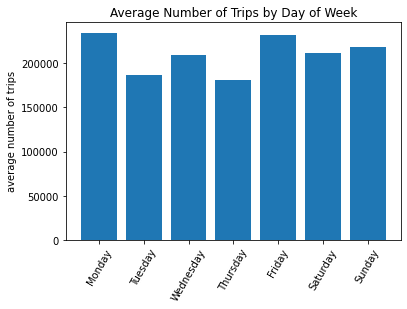

In [12]:
avgwd = wdf.groupby('dropoff_day')['trips'].mean().compute()
index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.bar(index, avgwd.values)
plt.ylabel('average number of trips')
plt.title('Average Number of Trips by Day of Week')
plt.xticks(rotation=60)

In [8]:
# Plot average total fare amount by hour of pick up time
df['hour']=df['tpep_pickup_datetime'].dt.strftime('%H')

In [58]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,total_amount,travel_time,pickup_day,dropoff_day,month,week,hour
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.2,238,239,11.27,4.800000,Wednesday,Wednesday,2020-01,1,00
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.2,239,238,12.30,7.416667,Wednesday,Wednesday,2020-01,1,00
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,0.6,238,238,10.80,6.183333,Wednesday,Wednesday,2020-01,1,00
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,0.8,238,151,8.16,4.850000,Wednesday,Wednesday,2020-01,1,00
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,0.0,193,193,4.80,2.300000,Wednesday,Wednesday,2020-01,1,00


In [14]:
mask = (df['month'] >= '2020-01') & (df['month'] <= '2020-02')
print(df.loc[mask])
dfm = df.loc[mask]

Dask DataFrame Structure:
              VendorID tpep_pickup_datetime tpep_dropoff_datetime trip_distance PULocationID DOLocationID total_amount travel_time pickup_day dropoff_day      month    week    hour
npartitions=1                                                                                                                                                                       
               float64       datetime64[ns]        datetime64[ns]       float64        int64        int64      float64     float64     object      object  period[M]  UInt32  object
                   ...                  ...                   ...           ...          ...          ...          ...         ...        ...         ...        ...     ...     ...
Dask Name: loc-series, 140 tasks


In [62]:
dfm.groupby('hour')['total_amount'].mean().compute()

hour
00    19.547780
01    18.312361
02    17.635790
03    18.390474
04    21.553716
05    24.349180
06    19.412709
07    17.726658
08    17.607328
09    17.573287
10    17.590243
11    17.398483
12    17.679406
13    18.211602
14    18.798590
15    18.842139
16    19.914279
17    19.039490
18    18.579122
19    18.429927
20    18.915962
21    19.015411
22    19.289236
23    19.393556
Name: total_amount, dtype: float64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 <a list of 24 Text major ticklabel objects>)

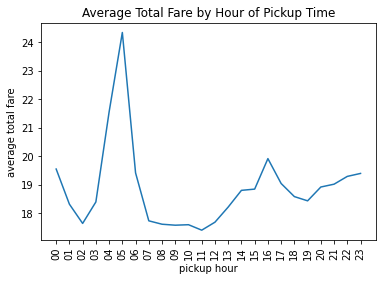

In [73]:
fdf = dfm.groupby('hour')['total_amount'].mean().compute()
plt.plot(fdf.index, fdf.values)
plt.xlabel('pickup hour')
plt.ylabel('average total fare')
plt.title('Average Total Fare by Hour of Pickup Time')
plt.xticks(rotation=90)

In [9]:
# Average speed by pick up hour (average speed should be calculated as total distance traveled by hour/total travel time by hour). Plot as barplot.
mask = (df['month'] >= '2020-01') & (df['month'] <= '2020-02')
print(df.loc[mask])
dfm = df.loc[mask]

Dask DataFrame Structure:
              VendorID tpep_pickup_datetime tpep_dropoff_datetime trip_distance PULocationID DOLocationID total_amount travel_time pickup_day dropoff_day      month    week    hour
npartitions=1                                                                                                                                                                       
               float64       datetime64[ns]        datetime64[ns]       float64        int64        int64      float64     float64     object      object  period[M]  UInt32  object
                   ...                  ...                   ...           ...          ...          ...          ...         ...        ...         ...        ...     ...     ...
Dask Name: loc-series, 140 tasks


In [10]:
dfm['time_hour']=dfm['travel_time']/60
dfm.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,total_amount,travel_time,pickup_day,dropoff_day,month,week,hour,time_hour
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.2,238,239,11.27,4.800000,Wednesday,Wednesday,2020-01,1,00,0.080000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.2,239,238,12.30,7.416667,Wednesday,Wednesday,2020-01,1,00,0.123611
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,0.6,238,238,10.80,6.183333,Wednesday,Wednesday,2020-01,1,00,0.103056
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,0.8,238,151,8.16,4.850000,Wednesday,Wednesday,2020-01,1,00,0.080833
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,0.0,193,193,4.80,2.300000,Wednesday,Wednesday,2020-01,1,00,0.038333


In [11]:
dfm.groupby('hour')[['trip_distance','time_hour']].sum().compute()

,trip_distance,time_hour
hour,,
00,1167745.47,90048.970833
01,745947.82,61974.126111
02,524074.13,44461.123056
03,402430.40,32742.288333
04,392249.26,25272.037500
05,536488.70,29165.204444
06,943251.74,59735.058889
07,1538493.50,121671.904444
08,1517215.12,157169.385000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

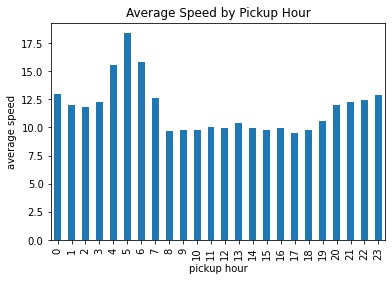

In [12]:
ndf = dfm.groupby('hour')[['trip_distance','time_hour']].sum()
sdf = pd.DataFrame(ndf['trip_distance']/ndf['time_hour']).plot(kind='bar',legend=False)
plt.xlabel('pickup hour')
plt.ylabel('average speed')
plt.title('Average Speed by Pickup Hour')
plt.xticks(rotation=90)

In [41]:
# Report top 5 and bottom 5 pickup locations in terms of a) total distance, b) average speed
tddf = dfm.groupby('PULocationID')['trip_distance'].sum().to_frame(name = 'total_distance').reset_index()

In [42]:
tddf.head()

,PULocationID,total_distance
0,1,1304.05
1,2,115.35
2,3,2769.36
3,4,55367.09
4,5,1025.21


In [43]:
tddf.tail()

,PULocationID,total_distance
256,261,283360.21
257,262,388484.35
258,263,509168.57
259,264,224646.03
260,265,18567.72


In [15]:
!curl https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv > taxi_zone_lookup.csv
zdf = pd.read_csv('taxi_zone_lookup.csv')
zdf.rename(columns={'LocationID':'PULocationID'}, inplace=True)
zdf.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12322  100 12322    0     0  27321      0 --:--:-- --:--:-- --:--:-- 27321


,PULocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [50]:
adf = tddf.merge(zdf, how='left', on='PULocationID')

In [52]:
adf.nlargest(5,'total_distance').compute()

,PULocationID,total_distance,Borough,Zone,service_zone
128,132,5792765.12,Queens,JFK Airport,Airports
134,138,2255969.51,Queens,LaGuardia Airport,Airports
157,161,1278850.93,Manhattan,Midtown Center,Yellow Zone
225,230,1201598.58,Manhattan,Times Sq/Theatre District,Yellow Zone
158,162,1072959.17,Manhattan,Midtown East,Yellow Zone


In [55]:
adf.nsmallest(5,'total_distance').compute()

,PULocationID,total_distance,Borough,Zone,service_zone
172,176,0.10,Staten Island,Oakwood,Boro Zone
199,204,0.11,Staten Island,Rossville/Woodrow,Boro Zone
107,111,10.97,Brooklyn,Green-Wood Cemetery,Boro Zone
29,30,16.59,Queens,Broad Channel,Boro Zone
102,105,17.48,Manhattan,Governor's Island/Ellis Island/Liberty Island,Yellow Zone


In [58]:
asdf = dfm.groupby('PULocationID')['time_hour'].sum().to_frame(name = 'total_time').reset_index()
bdf = asdf.merge(tddf, how='left', on='PULocationID')
bdf['speed'] = bdf['total_distance']/bdf['total_time']
bdf.head()

,PULocationID,total_time,total_distance,speed
0,1,70.645000,1304.05,18.459197
1,2,6.352222,115.35,18.158999
2,3,159.164444,2769.36,17.399363
3,4,5454.596667,55367.09,10.150538
4,5,44.587778,1025.21,22.993072


In [61]:
cdf = bdf.drop(columns=['total_time', 'total_distance'])
nbdf = cdf.merge(zdf, how='left', on='PULocationID')

In [62]:
nbdf.nlargest(5,'speed').compute()

,PULocationID,speed,Borough,Zone,service_zone
28,29,416.389221,Brooklyn,Brighton Beach,Boro Zone
75,76,185.597399,Brooklyn,East New York,Boro Zone
94,95,91.580687,Queens,Forest Hills,Boro Zone
199,204,44.000000,Staten Island,Rossville/Woodrow,Boro Zone
246,251,38.182314,Staten Island,Westerleigh,Boro Zone


In [63]:
nbdf.nsmallest(5,'speed').compute()

,PULocationID,speed,Borough,Zone,service_zone
172,176,2.278481,Staten Island,Oakwood,Boro Zone
216,221,3.594751,Staten Island,Stapleton,Boro Zone
202,207,5.433958,Queens,Saint Michaels Cemetery/Woodside,Boro Zone
176,180,6.218991,Queens,Ozone Park,Boro Zone
212,217,6.606332,Brooklyn,South Williamsburg,Boro Zone


In [1]:
!pip install dask_ml
import dask_ml.datasets
import dask_ml.ensemble

## try linear regression 
from dask_ml.linear_model import LinearRegression
from dask_ml.model_selection import train_test_split

X, y = dask_ml.datasets.make_regression(n_samples=1_000_000,
                                        chunks=100_000,
                                        n_features=20)
X

dask.array<normal, shape=(1000000, 20), dtype=float64, chunksize=(100000, 20), chunktype=numpy.ndarray>

In [2]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [3]:
lr.predict(X)[:5].compute()

array([  -3.73342498, -142.34101514,  164.52864812,  -80.82671136,
        151.93945759])

In [4]:
(lr.intercept_, lr.coef_)

(10.54326323814157,
 array([ 2.02092237e-09,  1.16161176e-07,  1.34129593e+01,  9.54278771e-08,
        -2.90638307e-09,  5.23716001e+01,  1.36595196e+01,  9.40886438e-08,
        -9.48113693e-09,  4.17513539e-08, -6.05619595e-08, -8.43583369e-08,
         4.61948059e+01,  1.57700804e-07,  5.39072025e+01,  3.63676034e+01,
         3.95869559e+01,  9.57343687e+01, -1.53521780e-08,  5.39276258e+01]))

In [5]:
lr.score(X, y)

0.9999999952646715

In [6]:
# try K-means clustering
import dask_ml.cluster

X, y = dask_ml.datasets.make_blobs(n_samples=1000000,
                                   chunks=100000,
                                   random_state=0,
                                   centers=3)
X = X.persist()
X

dask.array<concatenate, shape=(1000000, 2), dtype=float64, chunksize=(100000, 2), chunktype=numpy.ndarray>

In [7]:
km = dask_ml.cluster.KMeans(n_clusters=3, init_max_iter=2, oversampling_factor=10)
km.fit(X)

KMeans(init_max_iter=2, n_clusters=3, oversampling_factor=10)

In [8]:
km.labels_[::1000]

dask.array<getitem, shape=(1000,), dtype=int32, chunksize=(100,), chunktype=numpy.ndarray>

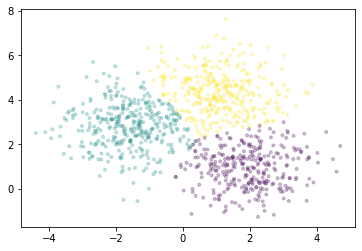

In [11]:
fig, ax = plt.subplots()
ax.scatter(X[::1000, 0], X[::1000, 1], marker='.', c=km.labels_[::1000],
           cmap='viridis', alpha=0.25);

In [19]:
# do some filtering to remove outliers and wrong values
df = df[(df.trip_distance > 0) & (df.trip_distance < 50)]
df = df[(df.total_amount > 0) & (df.total_amount < 300)]
df = df[(df.travel_time > 0) & (df.travel_time < 200)]

In [20]:
lr_taxi = LinearRegression(fit_intercept=False)
lr_taxi.fit(df[['trip_distance']].to_dask_array(),df[['travel_time']].to_dask_array())

LinearRegression(fit_intercept=False)

In [21]:
lr_taxi.coef_ #slope coefficient (min per mile)

array([3.06985567])

In [22]:
dist_sample=df[['trip_distance']].to_dask_array().compute()[:10] #take first 10 distances as a sample

In [24]:
#return the predicted vs actual time for the selected sample
pd.DataFrame({'distance':dist_sample.flatten(), 'predicted time':lr_taxi.predict(dist_sample), 'actual time': df[['travel_time']].to_dask_array().compute()[:10].flatten()})

,distance,predicted time,actual time
0,1.20,3.683827,4.800000
1,1.20,3.683827,7.416667
2,0.60,1.841913,6.183333
3,0.80,2.455885,4.850000
4,0.03,0.092096,0.883333
5,0.70,2.148899,11.450000
6,2.40,7.367654,16.866667
7,0.80,2.455885,14.433333
8,3.30,10.130524,25.283333
9,1.07,3.284746,5.616667


In [25]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [26]:
# do some filtering to remove outliers and wrong values
df = df[(df.trip_distance > 0) & (df.trip_distance < 50)]
df = df[(df.total_amount > 0) & (df.total_amount < 300)]
df = df[(df.travel_time > 0) & (df.travel_time < 200)]

In [27]:
# X as features, y as target (note: we need to call compute method, as sklearn only takes numpy arrays)
X = df[['trip_distance','travel_time']].values.compute()
y = df.total_amount.values.compute()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2002)

In [29]:
# make a pipeline - specify the model
pipeline = Pipeline([
    ('lasso', Lasso(fit_intercept=True))])

# we can specify parameters here we want to optimize
# notice the format - {'model__parameter': range}, this format should follow for all parameters
parameters = {'lasso__alpha': 2.0**(np.arange(-10, 10, 1))}

# call the gridsearch method and fit
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=3, refit=True)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=Pipeline(steps=[('lasso', Lasso())]), n_jobs=-1,
             param_grid={'lasso__alpha': array([9.765625e-04, 1.953125e-03, 3.906250e-03, 7.812500e-03,
       1.562500e-02, 3.125000e-02, 6.250000e-02, 1.250000e-01,
       2.500000e-01, 5.000000e-01, 1.000000e+00, 2.000000e+00,
       4.000000e+00, 8.000000e+00, 1.600000e+01, 3.200000e+01,
       6.400000e+01, 1.280000e+02, 2.560000e+02, 5.120000e+02])},
             verbose=1)

In [30]:
grid_search.best_params_

{'lasso__alpha': 0.001953125}

In [31]:
# r2 score
grid_search.score(X_test, y_test)

0.8635295712878329

**HW Task 2**

In [32]:
# prepare X as features and y as target
X = df[['trip_distance','travel_time','PULocationID']].values.compute()
y = df.total_amount.values.compute()

In [33]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2002)

In [40]:
# create pipeline and fit the model
pipeline = Pipeline([
    ('randForest', RandomForestRegressor(n_estimators=10))])

# we can specify parameters here we want to optimize
# notice the format - {'model__parameter': range}, this format should follow for all parameters
parameters = {'randForest__max_depth': [2,5]}

# call the gridsearch method and fit
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, cv=3, refit=True)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('randForest',
                                        RandomForestRegressor(n_estimators=10))]),
             n_jobs=-1, param_grid={'randForest__max_depth': [2, 5]},
             verbose=1)

In [41]:
# report test accuracy
grid_search.best_params_

{'randForest__max_depth': 5}

In [42]:
grid_search.score(X_test, y_test)

0.8748086075696755